In [52]:
import tushare as ts  #a packgae that can pull data online instead downloading csv file then transfer.
from datetime import datetime
import matplotlib.pyplot as plt  #to show the graph of the stocks

In [22]:
ts.set_token('9605a20f8f5faeb4f8e5174eabdff4febbf3bfb1fd2a4e81d47f047a')

In [24]:
pro = ts.pro_api('9605a20f8f5faeb4f8e5174eabdff4febbf3bfb1fd2a4e81d47f047a')

In [55]:
stock1 = '000002'  #fav stock1
stock2 = ''  #fav stock2

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


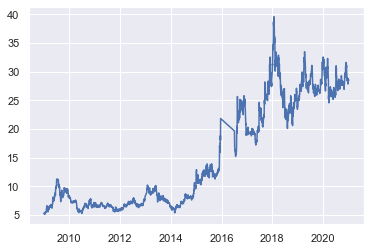

In [62]:
df = ts.get_k_data(stock1,start ='2009-01-01',end='2021-01-01')

df['date'] = df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))  #show the graph of the stock
plt.plot(df['date'],df['close'])
plt.show()


In [60]:
import mpl_finance as mpf
import seaborn as sns  

sns.set() 
df = ts.get_k_data('000002','2019-06-01','2021-04-28')  #get data
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
99,2019-06-03,26.81,26.44,27.02,26.28,317567.0,000002
100,2019-06-04,26.47,26.30,26.54,26.25,203260.0,000002
101,2019-06-05,26.64,27.03,27.28,26.63,576164.0,000002
102,2019-06-06,27.01,27.12,27.29,26.92,333792.0,000002
103,2019-06-10,27.29,27.81,28.05,27.17,527547.0,000002


In [66]:
from matplotlib.pylab import date2num
import datetime  #导入日期格式涉及的两个库

def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time
df_arr = df.values  #将DataFrame中数据转换成二维数组
df_arr[:,0] = date_to_num(df_arr[:,0])#  将二维数组中日期转换成数字格式


TypeError: strptime() argument 1 must be str, not Timestamp

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

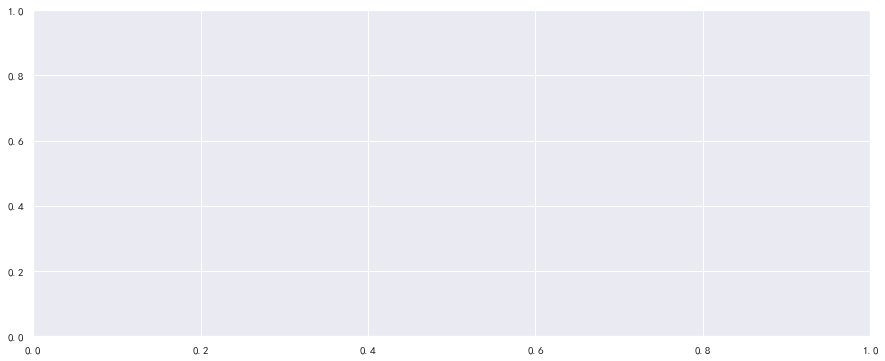

In [68]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置正常中文显示
fig,ax = plt.subplots(figsize = (15,6))
mpf.candlestick_ochl(ax,df_arr,width = 0.6,colorup = "r",colordown = 'g',alpha = 1.0) #绘制K直线
plt.plot(df_arr[:,0],df["MA5"])
plt.plot(df_arr[:,0],df['MA10'])
plt.grid(True)  #绘制网格线
plt.title('万科A')#标题
plt.xlabel('日期')#X轴
plt.ylabel('价格')#y轴
ax.xaxis_date()
